## Build Weaver Network

In [2]:
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import os
import numpy as np

In [3]:
G = nx.Graph()

with open('aves-weaver-social-16.edges', 'r') as f:
    lines = f.readlines()

    for line in lines:
        first_animal = line.split(' ')[0]
        second_animal = line.split(' ')[1].split('\n')[0]
        
        G.add_edge(first_animal, second_animal, weight=1)
 

In [4]:
pos=nx.spring_layout(G)

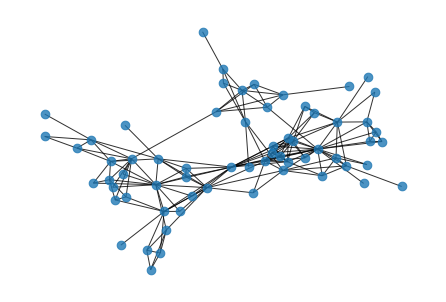

In [5]:
nx.draw(G, pos, with_labels = False, node_size = 75, alpha = 0.8)
plt.savefig(f"network.jpg")

In [6]:
print('nx.info:',nx.info(G))  # 返回圖的基本資訊
print('nx.degree:',nx.degree(G))  # 返回圖中各頂點的度
print('nx.density:',nx.degree_histogram(G))  # 返回圖中度的分佈

nx.info: Graph with 64 nodes and 177 edges
nx.degree: [('321', 1), ('322', 8), ('323', 4), ('324', 10), ('325', 5), ('326', 4), ('327', 3), ('328', 5), ('329', 21), ('330', 6), ('331', 9), ('332', 6), ('333', 8), ('334', 4), ('335', 10), ('336', 4), ('337', 6), ('338', 4), ('339', 12), ('340', 15), ('341', 15), ('342', 1), ('343', 6), ('344', 3), ('345', 7), ('346', 4), ('347', 4), ('348', 6), ('349', 4), ('350', 12), ('351', 8), ('352', 8), ('353', 8), ('211', 10), ('354', 4), ('220', 4), ('355', 13), ('356', 12), ('357', 4), ('358', 1), ('359', 3), ('360', 3), ('361', 5), ('362', 5), ('363', 1), ('364', 2), ('365', 1), ('126', 6), ('366', 2), ('367', 2), ('368', 5), ('369', 5), ('370', 4), ('371', 7), ('372', 5), ('373', 1), ('374', 1), ('375', 2), ('376', 3), ('377', 4), ('378', 1), ('379', 4), ('380', 2), ('381', 1)]
nx.density: [0, 9, 5, 5, 14, 7, 6, 2, 5, 1, 3, 0, 3, 1, 0, 2, 0, 0, 0, 0, 0, 1]


/var/folders/4p/slhgkvrd09356dhy7fljlz280000gn/T/ipykernel_49207/2503315560.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print('nx.info:',nx.info(G))  # 返回圖的基本資訊


## Small World Phenomenon 

In [7]:
# -------- Average Shortest Path Length ----------
a = nx.average_shortest_path_length(G)
print(a)

3.0436507936507935


## Transitivity

In [9]:
transitivity = nx.transitivity(G)
print(transitivity)

0.4775323686214775


## Degree Distribution

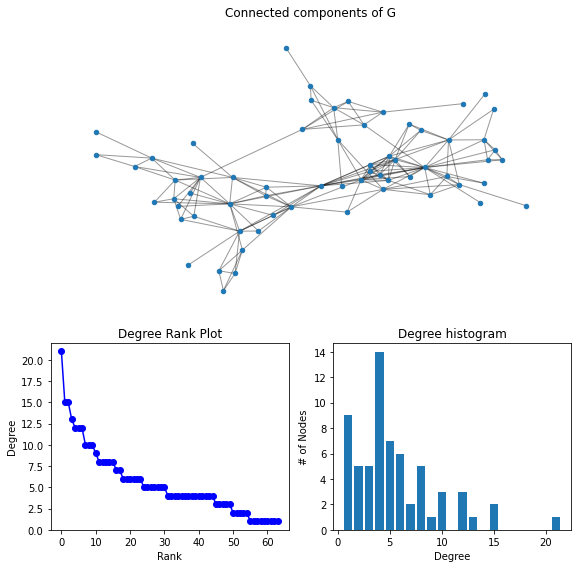

<Figure size 432x288 with 0 Axes>

In [8]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
# pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()
plt.savefig(f"degree_distribution.jpg")

## Degree Correlations

In [9]:
r = nx.degree_pearson_correlation_coefficient(G)
print(r)

-0.029052050542118672


## Community Detection (Louvain Algorithm)

In [10]:
import networkx as nx
import numpy as np
from community import community_louvain
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import networkx.algorithms.community as nx_comm

In [11]:
partition = community_louvain.best_partition(G)

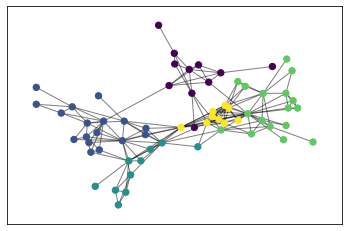

In [12]:
# draw the graph

# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()), label = True )
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [13]:
community = []
dic = {}
for i in range(5):
    temp = []
    for (k,v) in partition.items():
        if i == v:
            temp.append(k)
    community.append(set(temp))
    print(f'community_{i}:\n', temp)
print("modularity: ", nx_comm.modularity(G, community))

community_0:
 ['342', '343', '368', '369', '370', '371', '372', '376', '377', '378', '381']
community_1:
 ['321', '322', '334', '335', '336', '337', '340', '344', '345', '361', '362', '365', '126', '366', '367', '379', '380']
community_2:
 ['323', '324', '325', '326', '327', '338', '339', '358', '359', '360']
community_3:
 ['328', '329', '330', '332', '333', '346', '347', '348', '349', '211', '354', '357', '363', '364', '373', '374', '375']
community_4:
 ['331', '341', '350', '351', '352', '353', '220', '355', '356']
modularity:  0.5454052156149255


## Centrality

### 1. Degree Centrality (local)

In [14]:
c = nx.degree_centrality(G)


In [15]:
degree_centrality = {k: v for k, v in sorted(c.items(), key=lambda item: item[1], reverse=True)}


{'329': Text(0.4492507439111576, 0.03542321205667497, '329'),
 '340': Text(-0.40978172354086506, -0.20899656061336194, '340'),
 '341': Text(-0.008080674038113468, -0.08799888541727308, '341'),
 '355': Text(0.16967334998599148, -0.04658128218661879, '355'),
 '339': Text(-0.13833427278054283, -0.22912336725881058, '339'),
 '350': Text(0.29347347525761347, 0.11174605896303688, '350'),
 '356': Text(0.319008502495299, 0.08879401422642408, '356'),
 '324': Text(-0.36594469926814543, -0.39263411560322126, '324'),
 '335': Text(-0.5384830450045748, -0.0312480397075433, '335'),
 '211': Text(0.5543355338954425, 0.22042401383333532, '211')}

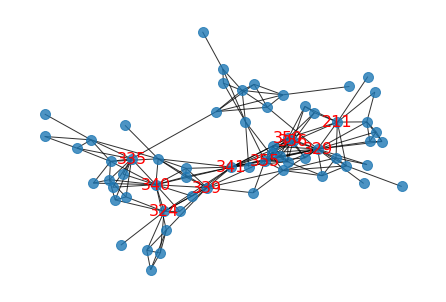

In [16]:
labels = {}    
num = 0
for node in degree_centrality.keys():
    labels[node] = node
    num += 1
    if num == 10:
        break
#set the argument 'with labels' to False so you have unlabeled graph
nx.draw(G, pos,  with_labels=False, node_size = 100, alpha = 0.8)
#Now only add labels to the nodes you require (the hubs in my case)
nx.draw_networkx_labels(G, pos , labels, font_size=16, font_color='r')


### 2. Betweenness Centralization 

In [17]:
bc = nx.betweenness_centrality(G, normalized= True)
between_c = {k: v for k, v in sorted(bc.items(), key=lambda item: item[1], reverse=True)}

{'329': Text(0.4492507439111576, 0.03542321205667497, '329'),
 '341': Text(-0.008080674038113468, -0.08799888541727308, '341'),
 '340': Text(-0.40978172354086506, -0.20899656061336194, '340'),
 '339': Text(-0.13833427278054283, -0.22912336725881058, '339'),
 '324': Text(-0.36594469926814543, -0.39263411560322126, '324'),
 '335': Text(-0.5384830450045748, -0.0312480397075433, '335'),
 '343': Text(0.06634069926446895, 0.22243149317281985, '343'),
 '322': Text(-0.39733794447984916, -0.0312868204444905, '322'),
 '355': Text(0.16967334998599148, -0.04658128218661879, '355'),
 '333': Text(0.26576266472144033, -0.11140299929774515, '333')}

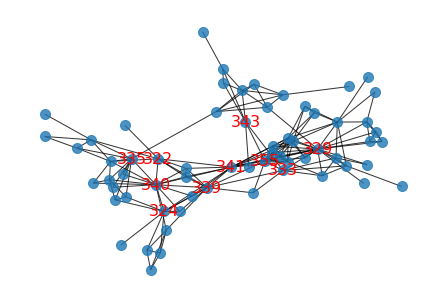

In [18]:
labels = {}    
num = 0
for node in between_c.keys():
    labels[node] = node
    num += 1
    if num == 10:
        break
#set the argument 'with labels' to False so you have unlabeled graph
nx.draw(G, pos,  with_labels=False, node_size = 100, alpha = 0.8)
#Now only add labels to the nodes you require (the hubs in my case)
nx.draw_networkx_labels(G, pos , labels, font_size=16, font_color='r')

### 3. Closeness Centralizatioin

In [19]:
c = nx.closeness_centrality(G)

In [20]:
closeness_centrality = {k: v for k, v in sorted(c.items(), key=lambda item: item[1], reverse=True)}

{'341': Text(-0.008080674038113468, -0.08799888541727308, '341'),
 '329': Text(0.4492507439111576, 0.03542321205667497, '329'),
 '355': Text(0.16967334998599148, -0.04658128218661879, '355'),
 '339': Text(-0.13833427278054283, -0.22912336725881058, '339'),
 '333': Text(0.26576266472144033, -0.11140299929774515, '333'),
 '340': Text(-0.40978172354086506, -0.20899656061336194, '340'),
 '350': Text(0.29347347525761347, 0.11174605896303688, '350'),
 '356': Text(0.319008502495299, 0.08879401422642408, '356'),
 '331': Text(0.2895220087257575, -0.051374799962967, '331'),
 '351': Text(0.2067004891049758, 0.0091080293656719, '351')}

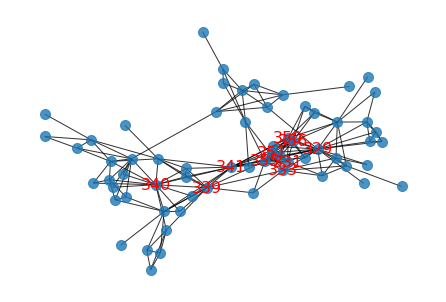

In [21]:
labels = {}    
num = 0
for node in closeness_centrality.keys():
    labels[node] = node
    num += 1
    if num == 10:
        break
#set the argument 'with labels' to False so you have unlabeled graph
nx.draw(G, pos,  with_labels=False, node_size = 100, alpha = 0.8)
#Now only add labels to the nodes you require (the hubs in my case)
nx.draw_networkx_labels(G, pos , labels, font_size=16, font_color='r')

### 4. Eigenvector Centrality

In [22]:
c = nx.eigenvector_centrality(G)

In [23]:
eigenvector_centrality = {k: v for k, v in sorted(c.items(), key=lambda item: item[1], reverse=True)}

{'341': Text(-0.008080674038113468, -0.08799888541727308, '341'),
 '329': Text(0.4492507439111576, 0.03542321205667497, '329'),
 '355': Text(0.16967334998599148, -0.04658128218661879, '355'),
 '339': Text(-0.13833427278054283, -0.22912336725881058, '339'),
 '333': Text(0.26576266472144033, -0.11140299929774515, '333'),
 '340': Text(-0.40978172354086506, -0.20899656061336194, '340'),
 '350': Text(0.29347347525761347, 0.11174605896303688, '350'),
 '356': Text(0.319008502495299, 0.08879401422642408, '356'),
 '331': Text(0.2895220087257575, -0.051374799962967, '331'),
 '351': Text(0.2067004891049758, 0.0091080293656719, '351')}

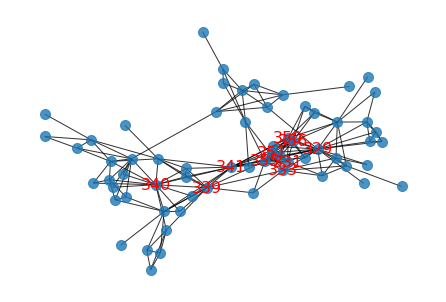

In [24]:
labels = {}    
num = 0
for node in closeness_centrality.keys():
    labels[node] = node
    num += 1
    if num == 10:
        break
#set the argument 'with labels' to False so you have unlabeled graph
nx.draw(G, pos,  with_labels=False, node_size = 100, alpha = 0.8)
#Now only add labels to the nodes you require (the hubs in my case)
nx.draw_networkx_labels(G, pos , labels, font_size=16, font_color='r')

### 5. Page Rank

In [25]:
c = nx.pagerank(G)

In [26]:
page_rank = {k: v for k, v in sorted(c.items(), key=lambda item: item[1], reverse=True)}

{'329': Text(0.4492507439111576, 0.03542321205667497, '329'),
 '340': Text(-0.40978172354086506, -0.20899656061336194, '340'),
 '341': Text(-0.008080674038113468, -0.08799888541727308, '341'),
 '339': Text(-0.13833427278054283, -0.22912336725881058, '339'),
 '335': Text(-0.5384830450045748, -0.0312480397075433, '335'),
 '355': Text(0.16967334998599148, -0.04658128218661879, '355'),
 '324': Text(-0.36594469926814543, -0.39263411560322126, '324'),
 '211': Text(0.5543355338954425, 0.22042401383333532, '211'),
 '350': Text(0.29347347525761347, 0.11174605896303688, '350'),
 '356': Text(0.319008502495299, 0.08879401422642408, '356')}

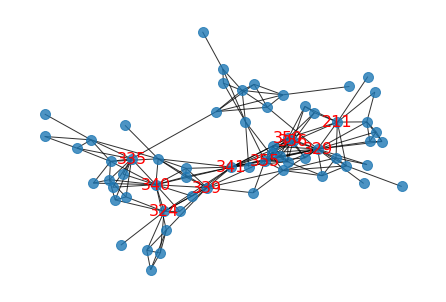

In [27]:
labels = {}    
num = 0
for node in page_rank.keys():
    labels[node] = node
    num += 1
    if num == 10:
        break
#set the argument 'with labels' to False so you have unlabeled graph
nx.draw(G, pos,  with_labels=False, node_size = 100, alpha = 0.8)
#Now only add labels to the nodes you require (the hubs in my case)
nx.draw_networkx_labels(G, pos , labels, font_size=16, font_color='r')